# Assignment - II 
## Mohammad Wasiq
### mohammadwasiq0786@gmail.com
1. **The data on features given in the table below are collected to estimate the published relative performance (PRP) of a centralised processing unit. The data is given in the CPU_Data file.**

   a. Provide a descriptive summary of fields in the dataset

   b. Explore the relationship between the response variable PRP and explanatory features using scatter plots and correlation matrix. Give your interpretation of the relationship between response and explanatory features.

   c. Develop a model to predict the PRP using explanatory features. Provide the model coefficient table and interpret. Are all features have a significant impact on the response? Provide the mathematical expression of your model.
   d. Provide F statistic value and corresponding p_value? Give your comments on model significance ?
   
   e. Provide R2 and adjusted R2 values. Comment on model accuracy.

   f. Comment on model adequacy based on residual analysis and plots. Provide normal probability plot of residuals and normality test result (test statistic and p_value) and comment on the normality of residuals.

   g. Provide Residuals versus Predicted values plot and given your interpretation.
 
   h. Perform k fold (k = 10) cross-validation. Provide the mean square error and root mean square error obtained for original data and during cross-validation. Give your comments on model generalizability

In [3]:
# import require libraries
import pandas as pd 
mydata = pd.read_excel("C:/Users/ACER/Downloads/DP-02/Project/Project - II//CPU_Data.xlsx")
print(mydata.head())

   MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0   125   256   6000   256     16    128  198
1    29  8000  32000    32      8     32  269
2    29  8000  32000    32      8     32  220
3    29  8000  32000    32      8     32  172
4    29  8000  16000    32      8     16  132


In [4]:
# 1. (a)-: Descriptive Statistics
mydata.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


In [12]:
prp = mydata.PRP
myct = mydata.MYCT
mmin = mydata.MMIN
mmax = mydata.MMAX
cach = mydata.CACH
chmin = mydata.CHMIN
chmax = mydata.CHMAX

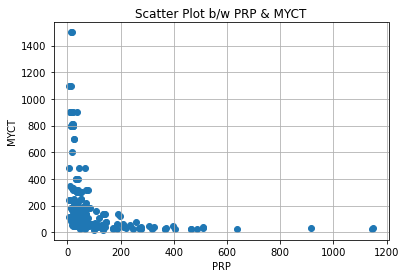

In [17]:
import matplotlib.pyplot as plt

# 1. (b) -: Scatter plot b/w PRP and MYCT
plt.scatter(prp, myct)
plt.title("Scatter Plot b/w PRP & MYCT")
plt.xlabel("PRP")
plt.ylabel("MYCT")
plt.grid()
plt.show()

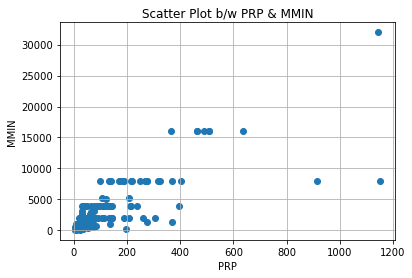

In [19]:
# Scatter plot b/w PRP and MYCT
plt.scatter(prp, mmin)
plt.title("Scatter Plot b/w PRP & MMIN")
plt.xlabel("PRP")
plt.ylabel("MMIN")
plt.grid()
plt.show()

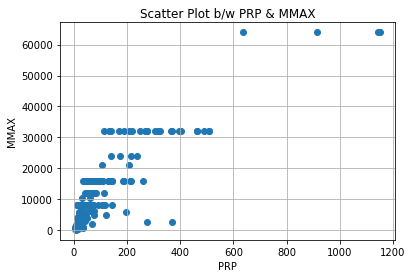

In [20]:
# Scatter plot b/w PRP and MMAX
plt.scatter(prp, mmax)
plt.title("Scatter Plot b/w PRP & MMAX")
plt.xlabel("PRP")
plt.ylabel("MMAX")
plt.grid()
plt.show()

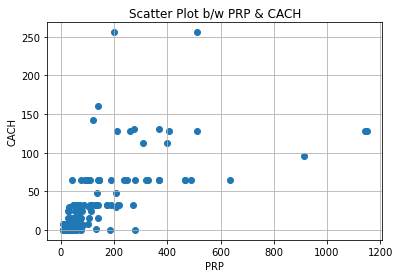

In [21]:
# Scatter plot b/w PRP and CACH
plt.scatter(prp, cach)
plt.title("Scatter Plot b/w PRP & CACH")
plt.xlabel("PRP")
plt.ylabel("CACH")
plt.grid()
plt.show()

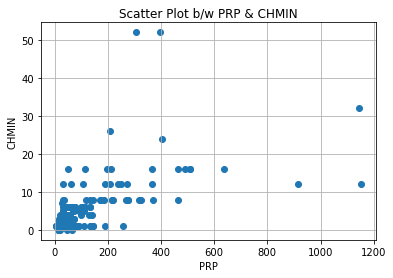

In [22]:
# Scatter plot b/w PRP and CHMIN
plt.scatter(prp, chmin)
plt.title("Scatter Plot b/w PRP & CHMIN")
plt.xlabel("PRP")
plt.ylabel("CHMIN")
plt.grid()
plt.show()

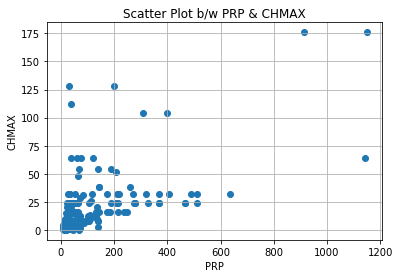

In [23]:
# Scatter plot b/w PRP and CHMAX
plt.scatter(prp, chmax)
plt.title("Scatter Plot b/w PRP & CHMAX")
plt.xlabel("PRP")
plt.ylabel("CHMAX")
plt.grid()
plt.show()

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math as math

from scipy import stats
from pandas.plotting  import scatter_matrix

from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import tree

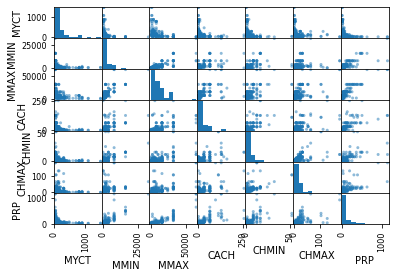

In [25]:
# Step- 1 :Correlation Analysis
scatter_matrix(mydata)
plt.show()

In [26]:
# 1.(c) -:  Regression Output
mymodel = ols("prp ~ myct + mmin + mmax + cach + chmin + chmax", mydata).fit()
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    prp   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     215.5
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           6.24e-85
Time:                        21:59:05   Log-Likelihood:                -1148.7
No. Observations:                 209   AIC:                             2311.
Df Residuals:                     202   BIC:                             2335.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -55.8939      8.045     -6.948      0.000     -71.757     -40.031
myct           0.0489      0.018      2.789      0.006       0.014       0.083
mmin           0.0153      0.002      8.371      0.000       0.012       0.019
mmax           0.0056      0.001      8.681      0.000       0.004       0.007
cach           0.6414      0.140      4.596      0.000       0.366       0.917
chmin         -0.2704      0.856     -0.316      0.752      -1.958       1.417
chmax          1.4825      0.220      6.737      0.000       1.049       1.916
==============================================================================
Omnibus:                       99.727   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1140.969
Skew:                           1.495   Prob(JB):                    1.74e-248
Kurtosis:                      14.049   Cond. No.                     3.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Mathematival Model :- 
$$prp = b_0 + b_1(myct) + b_2(mmin) + b_3(mmax) + b_4(cach) + b_5(chmin) + b_6(chmax)$$

* Fitted Model
$$prp = -55.8939 + 0.0489(myct) + 0.0153(mmin) + 0.0056(mmax) + 0.6414(cach) + (-0.2704)*(chmin) + 1.4825(chmax)$$

* 1.(d) -: F- Statistics : = : **215.5**

* p-value : = : **6.24e-85**

* 1.(e) -: $R^2$ : = : **0.865**

* $R_{adj.}^2$ : = : **0.861**

In [27]:
# Step 2: Regression Output
anova_table = anova_lm(mymodel)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
myct,1.0,5.074105e+05,5.074105e+05,141.001642,5.180080e-25
mmin,1.0,2.902287e+06,2.902287e+06,806.501372,1.844563e-72
mmax,1.0,8.557000e+05,8.557000e+05,237.785954,5.669903e-36
cach,1.0,2.104457e+05,2.104457e+05,58.479645,8.191779e-13
chmin,1.0,1.412600e+04,1.412600e+04,3.925400,4.891840e-02
chmax,1.0,1.633473e+05,1.633473e+05,45.391731,1.646289e-10
Residual,202.0,7.269201e+05,3.598614e+03,NaN,NaN


In [28]:
# 1 (f) -: Residual Analysis
pred = mymodel.predict()
pred = pd.DataFrame(pred, columns=["Predicted"])

print(pred)
print("x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-x-x")
print()

res = mymodel.resid
res = pd.DataFrame(res, columns= ['Residuals'])

print(res)
print("x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-x-x")

print()

myresult = mydata.join(pred)
myresult = myresult.join(res)
print(myresult)
print("x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-x-x")

      Predicted
0    337.185648
1    311.949000
2    311.949000
3    311.949000
4    199.087209
..          ...
204   21.617184
205   40.601444
206   45.583086
207   40.482179
208    5.134549

[209 rows x 1 columns]
x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-x-x

      Residuals
0   -139.185648
1    -42.949000
2    -91.949000
3   -139.949000
4    -67.087209
..          ...
204   20.382816
205    5.398556
206    6.416914
207   26.517821
208   39.865451

[209 rows x 1 columns]
x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-x-x

     MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP   Predicted   Residuals
0     125   256   6000   256     16    128  198  337.185648 -139.185648
1      29  8000  32000    32      8     32  269  311.949000  -42.949000
2      29  8000  32000    32      8     32  220  311.949000  -91.949000
3      29  8000  32000    32      8     32  172  311.949000 -139.949000
4      29  8000  16000    32      8     16  132  199.087209  -67.087209
..    ...   ..

In [29]:
# Normality Test
# Residual Analysis: Normality test
nt = stats.mstats.normaltest(res)
print("Normality Test" , "\n" , nt)
print()

res_sq = res**2
mse = res_sq.mean()
print("MSE" , "\n" , mse)
print()

import math as math
rmse = math.sqrt(mse)
print("RMSE" , "\n" , rmse)

Normality Test 
 NormaltestResult(statistic=masked_array(data=[99.72738283280225],
             mask=[False],
       fill_value=1e+20), pvalue=array([2.21041577e-22]))

MSE 
 Residuals    3478.086676
dtype: float64

RMSE 
 58.975305642407285


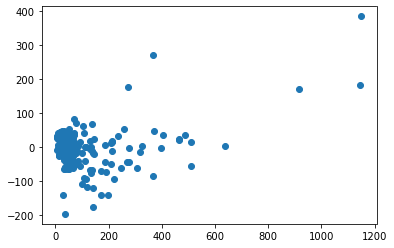

In [32]:
# Model adequacy check
# Residuals Vs Independent variables
plt.scatter(prp, res)
plt.show()

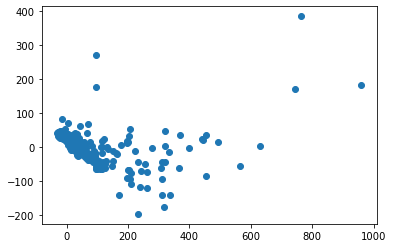

In [33]:
#  Model adequacy check
# Residuals Vs Fitted

plt.scatter(pred, res)
plt.show()

In [36]:
# Seperating x and y
x = mydata.iloc[:, 0:5]
y = mydata.PRP


,MYCT,MMIN,MMAX,CACH,CHMIN
0,125,256,6000,256,16
1,29,8000,32000,32,8
2,29,8000,32000,32,8
3,29,8000,32000,32,8
4,29,8000,16000,32,8


In [42]:
# Step 4: Regression Modeling
# fitting the model
mymodel = LinearRegression()
mymodel = mymodel.fit(x,y) 
print(round(mymodel.intercept_ , 3))
print(mymodel.coef_)

-51.139
[0.04607342 0.01075683 0.0073926  0.86418159 1.6032736 ]


* Fitted Model
$$prp = -51.139 + 0.0461(myct) + 0.0108(mmin) + 0.0074(mmax) + 0.8641(cach) + 1.6032(chmin)$$

In [45]:
# Step 4: Regression Modeling
# Model accuracy
rsq = mymodel.score(x,y)
pred = mymodel.predict(x)

print("Rsq -:", '\t' , rsq)
print()
# print("Pred -:", '\t' , pred)

Rsq -: 	 0.8345300719128654



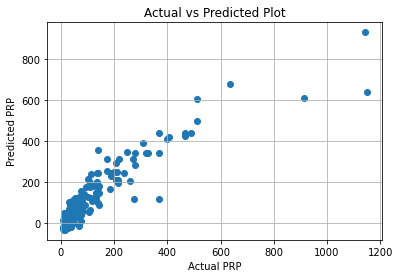

In [46]:
# Residual Analysis – Actual Vs Predicted Plot
plt.scatter(y, pred)
plt.title("Actual vs Predicted Plot")
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.grid()
plt.show()

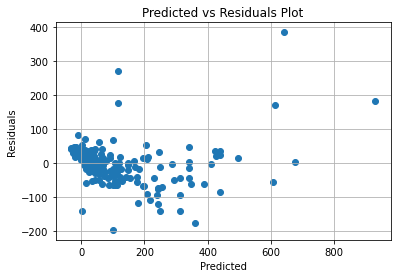

In [47]:
# Residual Analysis – Predicted Vs Residuals Plot
plt.scatter(pred, res)
plt.title("Predicted vs Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [51]:
# Cross Validation
myscore = cross_val_score(mymodel, x, y, scoring='neg_mean_squared_error', cv = 10)
cv_mse = -1*myscore.mean()
rmse = math.sqrt(cv_mse)

print(cv_mse , rmse)
print()
print("x--x--x-x-x-x-x-x-x-x-x--x-xx-x--x-x-x-x--x-x-x-x-x--xx-x--x-x-x-x-x-x--x-x")

6807.645047741712 82.50845440160488

x--x--x-x-x-x-x-x-x-x-x--x-xx-x--x-x-x-x--x-x-x-x-x--xx-x--x-x-x-x-x-x--x-x


2. **The data has collected on health profile parameters of people shown symptoms of heart disease and their diagnostic results are given in the Heart_Disease_Data file. The list of health profile features on which data is collected is given in the table below.**

   a. Provide a descriptive summary of the features

   b. Explore the relationship between response and the features graphically.

   c. Develop a logistic regression model to classify whether a patient is having heart disease or not using the feature values. Give the model coefficient table and the mathematical expression of the model.

   d. Provide pseudo R2, log-likelihood ratio value and corresponding p_value. Is the model significant ?

   e. Compute and give actual versus predicted matrix. Compute accuracy & misclassification %. Comment on model accuracy.

   f. Check model generalizability using k -fold (k = 10) cross-validation. Provide accuracy & misclassification % obtained for data used for developing the model and during cross-validation. Is there a deterioration in model performance? Comment on model generalizability.
   
   g. Compute sensitivity, specificity, precision & f-measure. Comment on the aforementioned performance measures. Is the model equally good at predicting having heart disease (positive) and not having heart disease (negative) cases correctly ?

In [2]:
mydata = pd.read_excel("C://Users//ACER//Downloads//DP-02//Project//Project - II//Heart_Disease_Data.xlsx")
print(mydata.head())

   Age  Sex  CP  RestBP  Cholesteral  FBP  RestECG  Max_HR  ExAngina  Oldpeak  \
0   63    1   3     145          233    1        0     150         0      2.3   
1   37    1   2     130          250    0        1     187         0      3.5   
2   41    0   1     130          204    0        0     172         0      1.4   
3   56    1   1     120          236    0        1     178         0      0.8   
4   57    0   0     120          354    0        1     163         1      0.6   

   Slope  CA  Thal  Result  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


In [54]:
# 1(a) -: Descriptive Statistics
mydata.describe()

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal,Result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
age = mydata.Age
# sex = mydata.Sex
# cp = mydata.CP
rbp = mydata.RestBP
ch = mydata.Cholesteral
# fbp = mydata.FBP
# recg = mydata.RestECG
maxhr = mydata.Max_HR
# exa = mydata.ExAngina
oldp = mydata.Oldpeak
# slope = mydata.Slope
# ca = mydata.CA
# thal = mydata.Thal

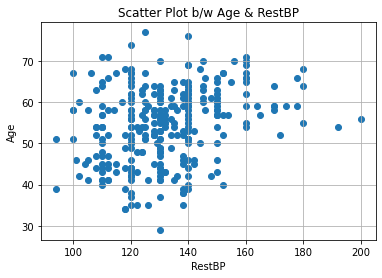

In [4]:
# 1. (b) -: Scatter plot b/w age and rbp
plt.scatter(rbp , age)
plt.title("Scatter Plot b/w Age & RestBP")
plt.xlabel("RestBP")
plt.ylabel("Age")
plt.grid()
plt.show()

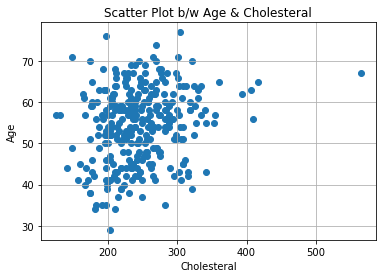

In [7]:
# 1. (b) -: Scatter plot b/w age and ch
plt.scatter(ch , age)
plt.title("Scatter Plot b/w Age & Cholesteral")
plt.xlabel("Cholesteral")
plt.ylabel("Age")
plt.grid()
plt.show()

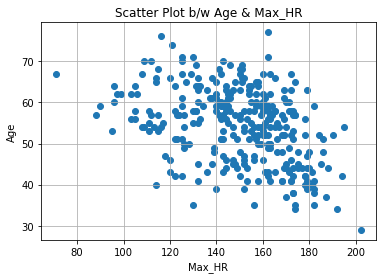

In [11]:
# 1. (b) -: Scatter plot b/w age and maxhr
plt.scatter(maxhr , age)
plt.title("Scatter Plot b/w Age & Max_HR")
plt.xlabel("Max_HR")
plt.ylabel("Age")
plt.grid()
plt.show()

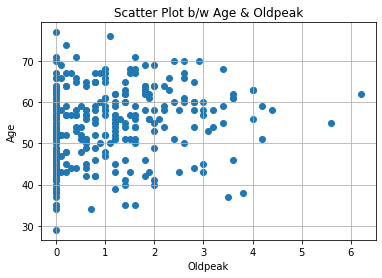

In [12]:
# 1. (b) -: Scatter plot b/w age and oldp
plt.scatter(oldp , age)
plt.title("Scatter Plot b/w Age & Oldpeak")
plt.xlabel("Oldpeak")
plt.ylabel("Age")
plt.grid()
plt.show()

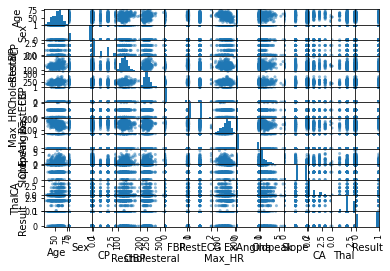

In [13]:
# Step- 1 :Correlation Analysis
scatter_matrix(mydata)
plt.show()

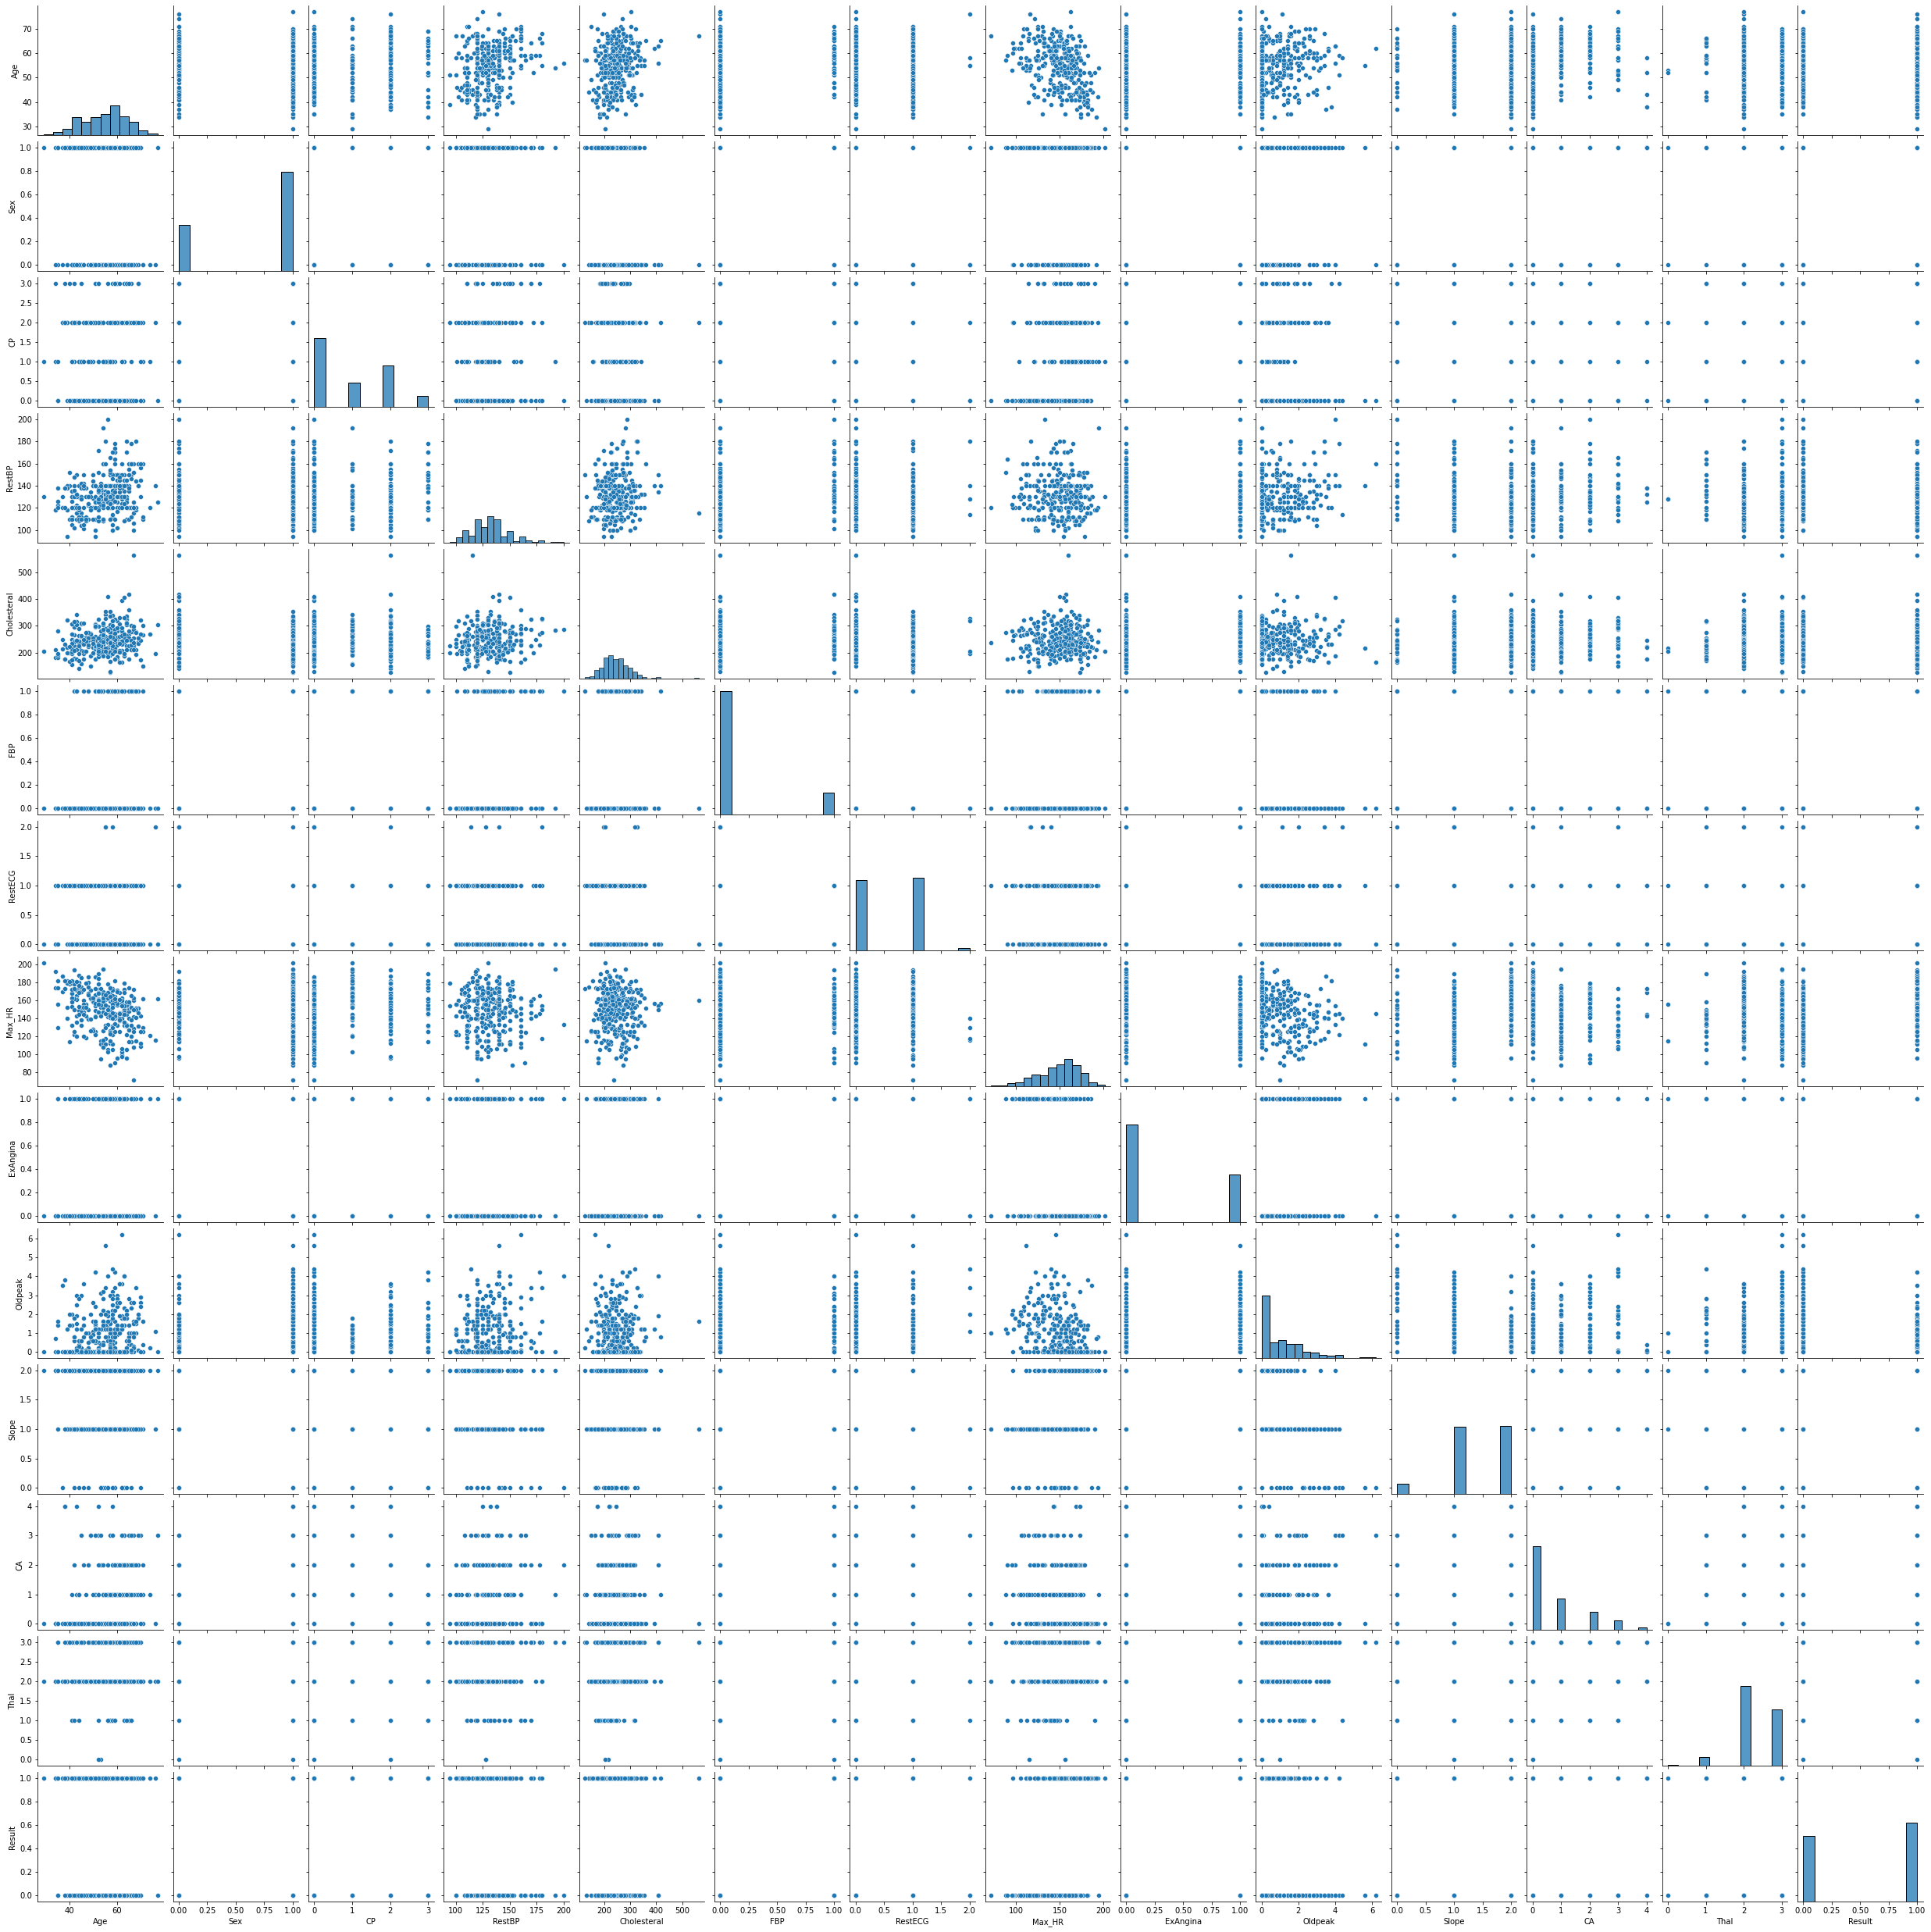

In [14]:
# Step 3 ; Correlation Analysis
# Scatter plot
sns.pairplot(mydata)
plt.show()

In [39]:
# Developing the Logistic model
x = mydata.iloc[ : , 0:12]
y = mydata.Result
x["Intercept"] = 1
print(x)
print(y)

     Age  Sex  CP  RestBP  Cholesteral  FBP  RestECG  Max_HR  ExAngina  \
0     63    1   3     145          233    1        0     150         0   
1     37    1   2     130          250    0        1     187         0   
2     41    0   1     130          204    0        0     172         0   
3     56    1   1     120          236    0        1     178         0   
4     57    0   0     120          354    0        1     163         1   
..   ...  ...  ..     ...          ...  ...      ...     ...       ...   
298   57    0   0     140          241    0        1     123         1   
299   45    1   3     110          264    0        1     132         0   
300   68    1   0     144          193    1        1     141         0   
301   57    1   0     130          131    0        1     115         1   
302   57    0   1     130          236    0        0     174         0   

     Oldpeak  Slope  CA  Intercept  
0        2.3      0   0          1  
1        3.5      0   0          1  


In [40]:
# Developing the model
mymodel = sm.Logit(y,x)
myresult = mymodel.fit()
myresult.summary()

Optimization terminated successfully.
         Current function value: 0.365282
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Sat, 29 Jan 2022   Pseudo R-squ.:                  0.4700
Time:                        17:21:39   Log-Likelihood:                -110.68
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.912e-35
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0070      0.022     -0.313      0.754      -0.051       0.037
Sex            -1.9605      0.451     -4.346      0.000      -2.845      -1.076
CP              0.8528      0.181      4.711      0.000       0.498       1.208
RestBP         -0.0197      0.010     -1.895      0.058      -0.040       0.001
Cholesteral    -0.0060      0.004     -1.587      0.113      -0.013       0.001
FBP             0.3352      0.509      0.659      0.510      -0.662       1.332
RestECG         0.3933      0.339      1.162      0.245      -0.270       1.057
Max_HR          0.0225      0.010      2.201      0.028       0.002       0.043
ExAngina       -1.0468      0.400     -2.616      0.009      -1.831      -0.262
Oldpeak        -0.5386      0.208     -2.589      0.010      -0.946      -0.131
Slope           0.5772      0.346      1.667      0.096      -0.101       1.256
CA             -0.7945      0.185     -4.288      0.000      -1.158      -0.431
Intercept       2.1506      2.438      0.882      0.378      -2.627       6.929
===============================================================================
"""

In [41]:
x = mydata.iloc[ : , [0 , 3,4,7,9]]
y = mydata.Result
x["Intercept"] = 1
# Developing the model
mymodel = sm.Logit(y,x)
myresult = mymodel.fit()
myresult.summary()

<ipython-input-41-1186b770b55d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Intercept"] = 1


Optimization terminated successfully.
         Current function value: 0.531473
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Sat, 29 Jan 2022   Pseudo R-squ.:                  0.2288
Time:                        17:23:14   Log-Likelihood:                -161.04
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 4.540e-19
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0012      0.017     -0.070      0.944      -0.035       0.033
RestBP         -0.0111      0.008     -1.323      0.186      -0.028       0.005
Cholesteral    -0.0031      0.003     -1.141      0.254      -0.008       0.002
Max_HR          0.0346      0.007      4.743      0.000       0.020       0.049
Oldpeak        -0.7131      0.142     -5.030      0.000      -0.991      -0.435
Intercept      -1.9642      1.754     -1.120      0.263      -5.403       1.474
===============================================================================
"""

In [18]:
mymodel = LogisticRegression(C=1e8)
mymodel = mymodel.fit(x,y)

print("Intercept -:" , "\n" , mymodel.intercept_)
print("\n")
print("Model coeff. -:" , "\n" , mymodel.coef_)

Intercept -: 
 [-3.92919907e-04 -1.20506733e-04  1.68817947e-04 -4.91781399e-04
 -3.46365220e-04 -1.55163412e-04  1.40862356e-04  7.82773497e-04
 -4.35973367e-04 -1.02775536e-04  9.56200101e-05  4.37692071e-04
  6.21084986e-04  7.31218023e-04 -7.59800676e-04  4.22297818e-04
  3.89249839e-04  1.13075060e-03 -1.38816415e-03  1.13903686e-03
  8.93283174e-04 -1.31763549e-03 -3.66268723e-04  8.10778473e-04
  1.62672291e-03 -2.45984247e-03  2.82955073e-04 -3.14091868e-04
  1.01322684e-03 -9.27550304e-04 -2.56441528e-04 -1.30515219e-03
 -7.21440099e-04  1.02409871e-03 -7.14422901e-05 -4.61517547e-04
 -5.08411209e-05  4.63754434e-04  2.48313049e-04  3.98236493e-04
 -3.75099118e-04]


Model coeff. -: 
 [[-4.51217003e-02 -5.56208191e-02  9.69643691e-02 -3.92919907e-04]
 [-8.16985059e-02 -4.07317901e-02  1.09847231e-01 -1.20506733e-04]
 [-1.65185620e-02 -1.43975048e-02  3.54941898e-02  1.68817947e-04]
 [-6.62484413e-02 -1.11449051e-02  6.47957833e-02 -4.91781399e-04]
 [-2.88445984e-02 -3.69527614

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# Regression with dummy variables – Output
mymodel = ols("age ~ rbp + ch + maxhr + oldp" , mydata).fit()
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     26.11
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.43e-18
Time:                        12:13:00   Log-Likelihood:                -1052.4
No. Observations:                 303   AIC:                             2115.
Df Residuals:                     298   BIC:                             2133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.7848      5.023     10.509      0.000      42.900      62.670
rbp            0.1216      0.026      4.589      0.000       0.069       0.174
ch             0.0315      0.009      3.575      0.000       0.014       0.049
maxhr         -0.1495      0.021     -7.101      0.000      -0.191      -0.108
oldp           0.1968      0.423      0.465      0.642      -0.636       1.030
==============================================================================
Omnibus:                        2.022   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.697
Skew:                          -0.026   Prob(JB):                        0.428
Kurtosis:                       2.637   Cond. No.                     3.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# Crosstab
mytable = pd.crosstab(y, ypred)
mytable

col_0,34,38,44,48,51,52,57,58,59,64,67
Age,,,,,,,,,,,
29,0,0,1,0,0,0,0,0,0,0,0
34,0,0,2,0,0,0,0,0,0,0,0
35,0,0,1,0,0,1,1,1,0,0,0
37,0,0,2,0,0,0,0,0,0,0,0
38,0,0,1,0,0,2,0,0,0,0,0
39,0,0,1,0,0,0,1,2,0,0,0
40,0,0,0,0,0,2,0,0,1,0,0
41,0,1,4,0,0,2,0,2,1,0,0
42,0,0,2,0,0,3,0,2,0,1,0


In [63]:
myscore = cross_val_score(mymodel, x, y, scoring="accuracy", cv = 5)
cv_accuracy = myscore.mean()
round(cv_accuracy*100,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

7.92